In [1]:
import pandas as pd

In [2]:
# read csv file, usecols to select relevant columns
hotels = pd.read_csv('../data/kenya_hotels.csv')
hotels_updated = hotels.drop(['link', 'status'], axis=1)


hotels_updated.head()

,id,name,reviews,rating
0,8,The Zehneria Portico Nairobi,557 reviews,4.5
1,1,Golden Tulip Westlands Nairobi,465 reviews,4.5
2,3,Palacina Residence & Suites,438 reviews,4.5
3,4,Crowne Plaza Nairobi Airport,890 reviews,4.5
4,5,Villa Rosa Kempinski Nairobi,"1,316 reviews",4.5


In [3]:
hotels_updated['reviews'] = hotels_updated['reviews'].map(lambda x: int(x.split(' ')[0].replace(',','')))
hotels_updated.head(30)

,id,name,reviews,rating
0,8,The Zehneria Portico Nairobi,557,4.5
1,1,Golden Tulip Westlands Nairobi,465,4.5
2,3,Palacina Residence & Suites,438,4.5
3,4,Crowne Plaza Nairobi Airport,890,4.5
4,5,Villa Rosa Kempinski Nairobi,1316,4.5
5,24,Blue Marlin Beach Hotel,118,4.0
6,31,Nyali Sun Africa Beach Hotel & Spa,279,4.5
7,6,"Radisson Blu Hotel & Residence, Nairobi Arboretum",266,4.5
8,7,Tamarind Tree Hotel,545,4.5
9,9,Hemingways Nairobi,967,4.5


<AxesSubplot:title={'center':'Frequency of reviews for Kenyan hotels'}, ylabel='Hotel name'>

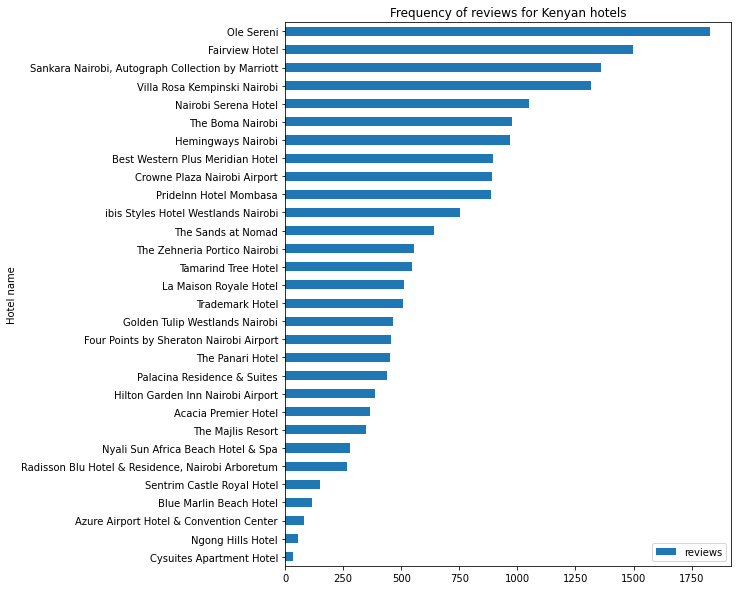

In [4]:
hotels_updated.sort_values('reviews', ascending=True).plot.barh(y='reviews', x='name', ylabel='Number of reviews', xlabel='Hotel name', 
                         title='Frequency of reviews for Kenyan hotels', figsize=(8,10), sort_columns=True)

In [5]:
# Plot hotel ratings and the number of hotels(Title=, y=Frequency, x=ratings)
# hotels_updated.plot.bar()

In [6]:
hotels_updated['reviews'].describe()

count      30.000000
mean      636.066667
std       452.284159
min        32.000000
25%       353.250000
50%       509.500000
75%       895.250000
max      1830.000000
Name: reviews, dtype: float64

<AxesSubplot:ylabel='rating'>

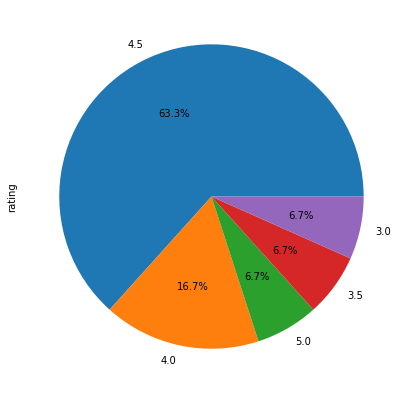

In [7]:
hotels_updated['rating'].value_counts().plot.pie(y='hotel rating', figsize=(7,7), autopct='%1.1f%%')

In [8]:
reviews = pd.read_csv('../data/hotel_reviews.csv', usecols=['id','name','hotel','review','date', 'sentiment'])

reviews.head()

,id,name,hotel,review,date,sentiment
0,84,Excellent trainer and coach,Golden Tulip Westlands Nairobi,Moses was professional and really helped me fo...,March 2021,positive
1,85,Gym and staff review,Golden Tulip Westlands Nairobi,The gym has excellent facilities and dedicated...,March 2021,positive
2,86,Quality services,Golden Tulip Westlands Nairobi,This is one of the best hotels with quality se...,March 2021,positive
3,87,Good results after my first 3 months with coac...,Golden Tulip Westlands Nairobi,Having being consistency in my training since ...,March 2021,positive
4,88,Gym consistency,Golden Tulip Westlands Nairobi,"Well equipped, great push to exterior limits ...",March 2021,positive


<AxesSubplot:>

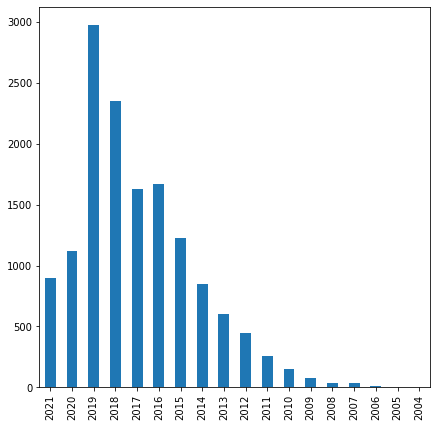

In [9]:
reviews['year'] = reviews['date'].map(lambda date: date.split(' ')[1] if type(date) != float and len(date.split(' ')) <= 2 and len(date.split(' ')[1]) == 4 else None)
reviews['month'] = reviews['date'].map(lambda date: date.split(' ')[0] if type(date) != float and len(date.split(' ')) <= 2 and len(date.split(' ')[1]) == 4 else None)
reviews['year'].value_counts().sort_index(ascending=False).plot(kind='bar', figsize=(7,7))

In [10]:
reviews['review'].describe()

count                                                 14359
unique                                                14359
top       It was an awesome place a great Experience. Gr...
freq                                                      1
Name: review, dtype: object

<AxesSubplot:title={'center':'Monthly frequency of reviews for Kenyan hotels'}, ylabel='Number of reviews'>

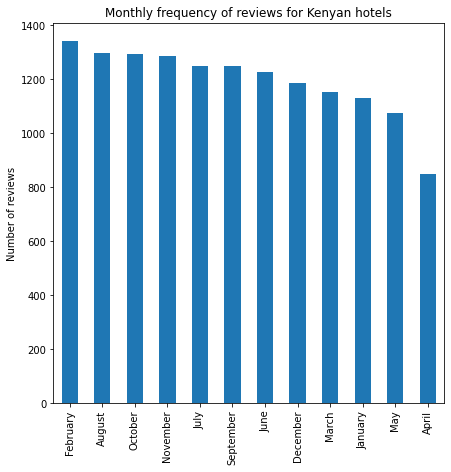

In [11]:
reviews['month'].value_counts().plot(kind='bar', figsize=(7,7), ylabel='Number of reviews', 
                         title='Monthly frequency of reviews for Kenyan hotels',)
